In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


In [ ]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
plot_colors = "ryb"
plot_step = 0.02
pairs = list(combinations(range(4), 2))

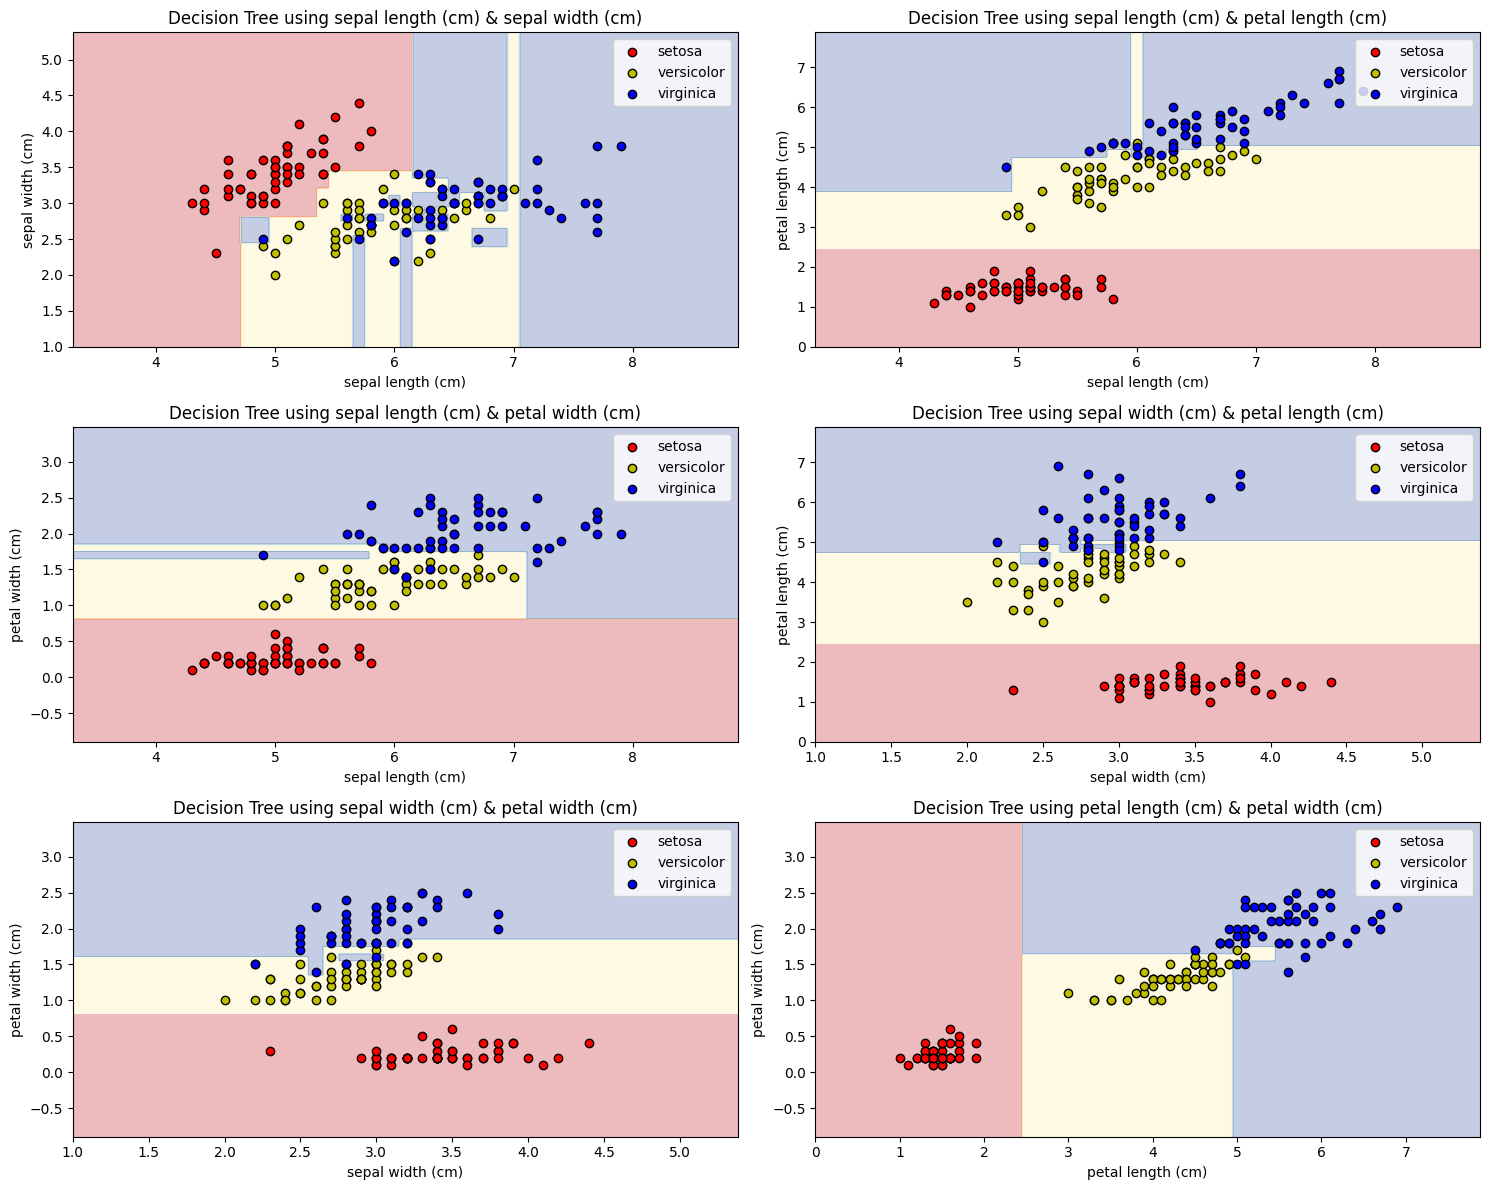

In [ ]:
plt.figure(figsize=(15, 12))
for i, (x_idx, y_idx) in enumerate(pairs):
    X_pair = X[:, [x_idx, y_idx]]

    clf = DecisionTreeClassifier().fit(X_pair, y)

    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(3, 2, i + 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)

    for color, i, target_name in zip(plot_colors, [0, 1, 2], target_names):
        plt.scatter(X_pair[y == i, 0], X_pair[y == i, 1],
                    color=color, label=target_name, edgecolor='k')

    plt.xlabel(feature_names[x_idx])
    plt.ylabel(feature_names[y_idx])
    plt.legend(loc='upper right')
    plt.title(f"Decision Tree using {feature_names[x_idx]} & {feature_names[y_idx]}")

plt.tight_layout()


In [ ]:
clf_full = DecisionTreeClassifier(random_state=0)
clf_full.fit(X, y)


DecisionTreeClassifier(random_state=0)

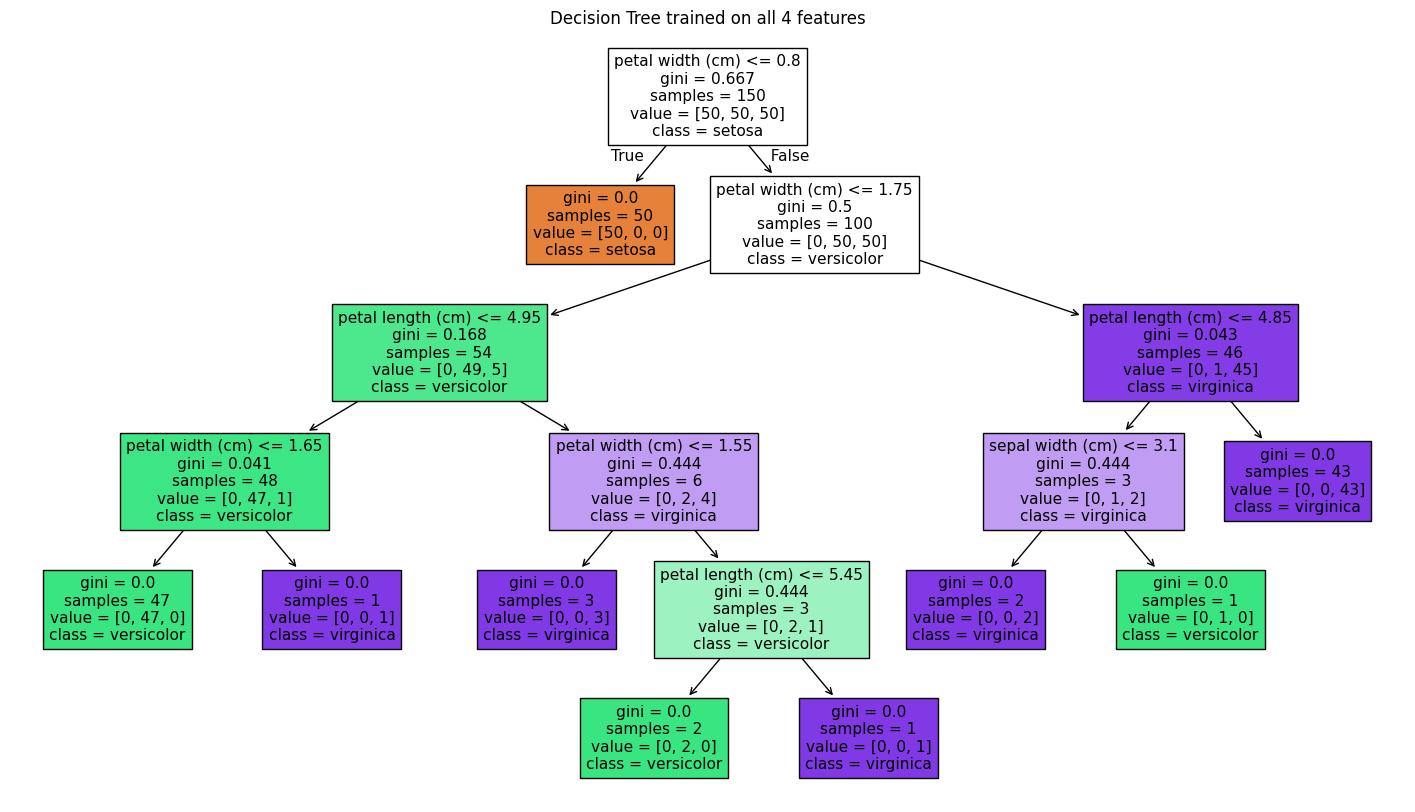

In [ ]:
plt.figure(figsize=(18, 10))
plot_tree(clf_full, filled=True,
          feature_names=feature_names,
          class_names=target_names)
plt.title("Decision Tree trained on all 4 features")
plt.show()